## Perceptrón
El perceptrón se desarrollaró en los 1950's, 1960's por Frank Rosenblatt, basado en el trabajo de Warrren McColloch y Walter Pitts. 

- Clasificación binaria
- Frontera de decisión lineal
- Aprenden iterativamente, muestra por muestra usando las etiquetas de las clases

- Puede usar una función umbral

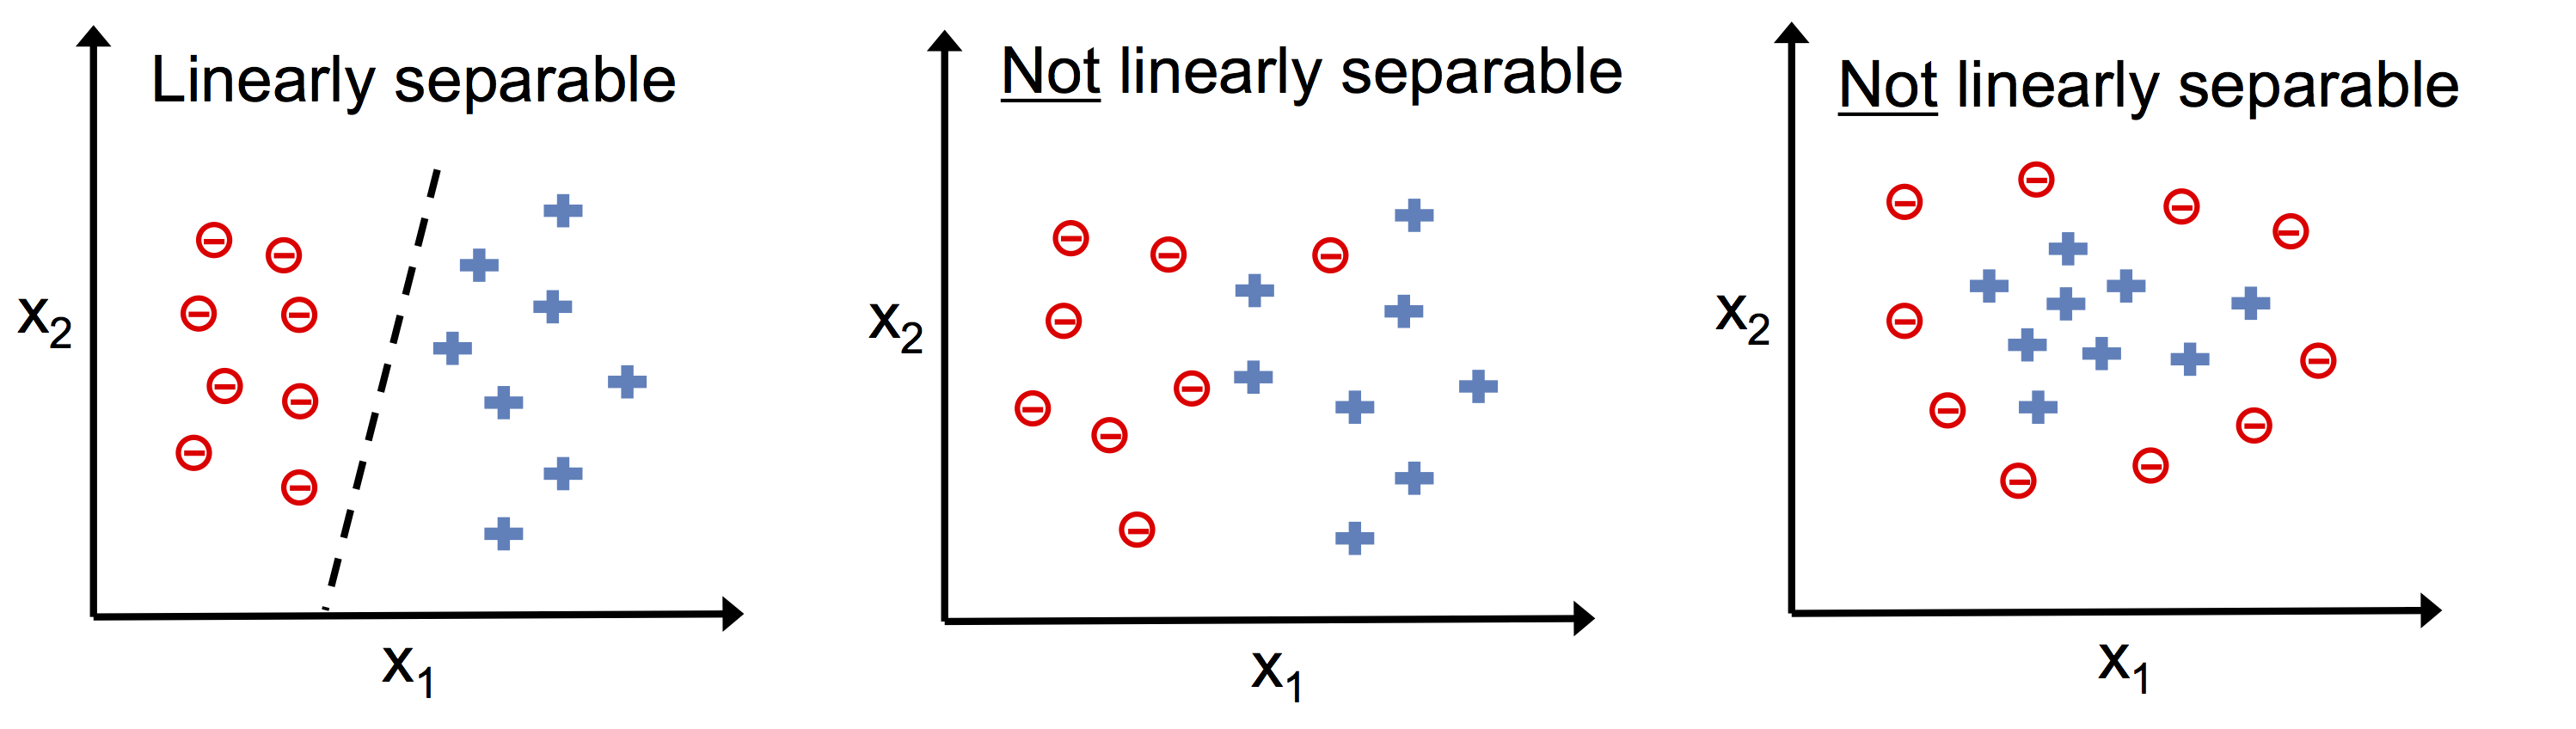

In [49]:
from IPython.display import Image
Image(filename='./images/02_03.png', width=600) 


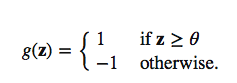

In [50]:
Image(filename='./diff-perceptron-adaline-neuralnet/2.png')

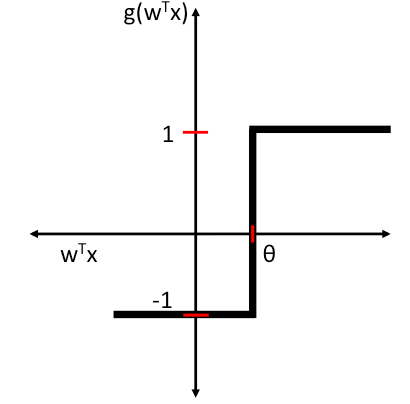

In [51]:
Image(filename='./diff-perceptron-adaline-neuralnet/3.png')

Es un clasificador lineal, es decir, el conjunto de datos tiene que ser linealmente separable. El perceptrón funciona entrenando una serie de pesos que corresponden a las características de entrada. Los pesos se multiplican por los valores de las características y se suman, si la suma es mayor que un cierto threshold se predice una clase, sino, pertenece a otra. Finalmente se revisa que las predicciones se hayan clasificado correctamente, si no se mejoran los pesos. Este proceso se realiza por un numero determinado de iteraciones, llamado epocas, hasta que se encuentren una serie de pesos que produzcan una frontera de decision que clasifica correctamente los datos.
https://jtsulliv.github.io/perceptron/

Aunque el perceptrón solo se puede aplicar a datos linealmente separables, el Perceptrón multicapas se puede aplocar a conjuntos de datos más complicados. Esto incluye aplicaciones en áreas como reconocimiento de voz, procesamiento de imagen, predicciones financieras, etc. 

Funciona ajustando una serie de pesos introducidos por Rosenblatt, $w_i$ con $i={1:n}$ que son numeros reales que determinan la importancia de cada entrada en la salida final. Dado un conjunto de datos $x_i$ con $i={1:n}$, y un conjunto de pesos $w_i$ con $i={1:n}$, se produce una salida binaria con valores 1 o 0. 
Esta salida depende de la suma de la multiplicacion de los datos de entrada y los pesos $\Sigma_i w_i*x_i$, así como de un sesgo $b$ (bias).

 

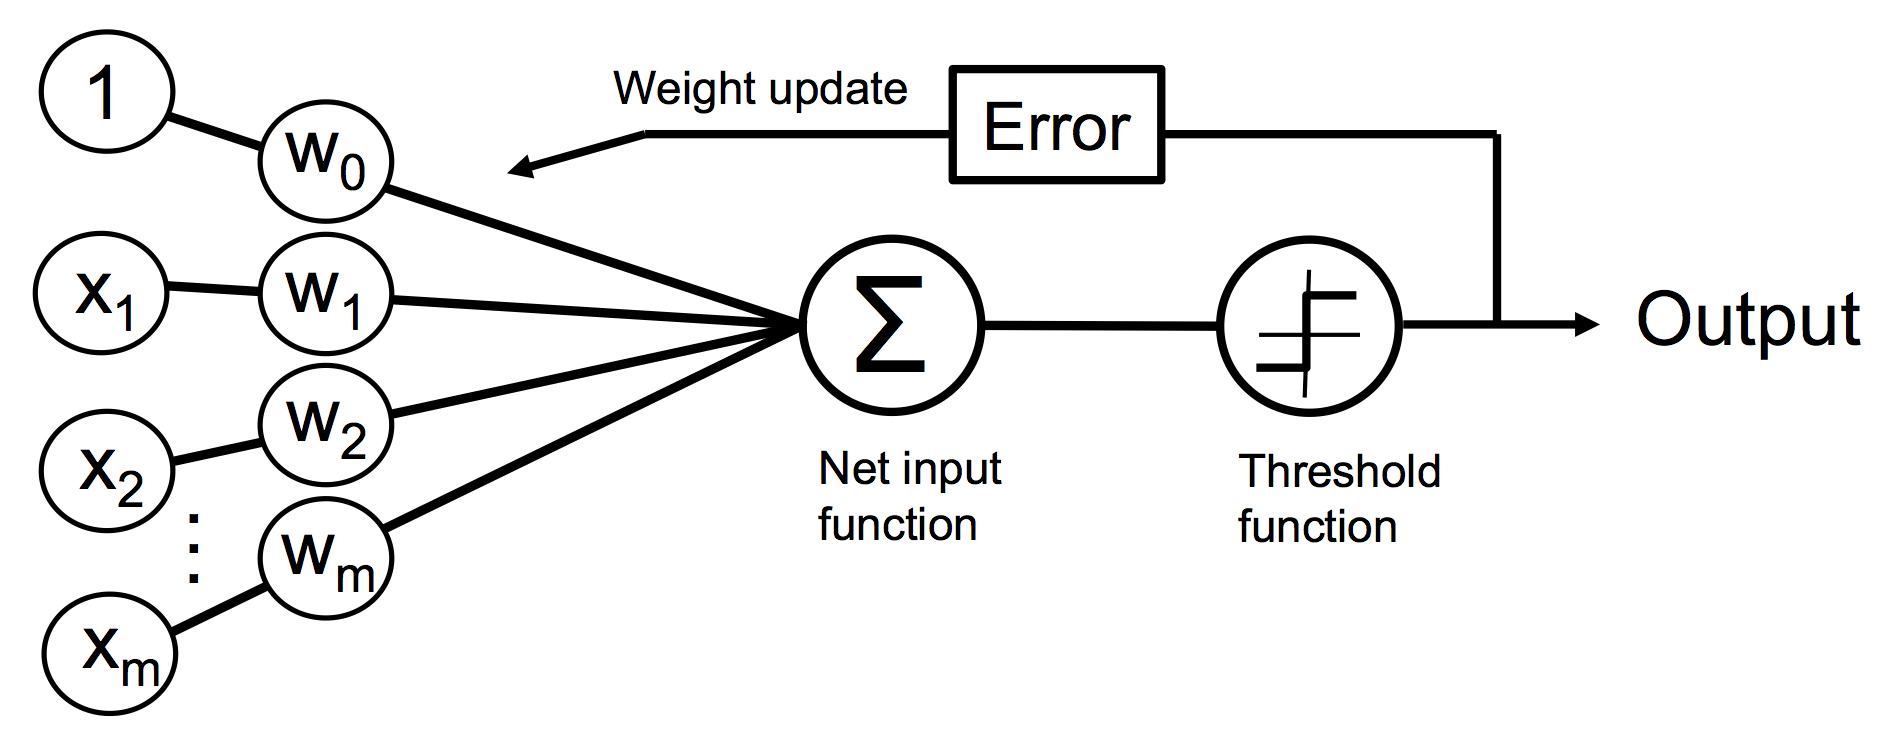

In [52]:
Image(filename='./images/02_04.png', width=600) 

\begin{equation}
    f(x) = 
    \begin{cases}
      0 & \text{if   }\quad \Sigma_i w_i*x_i \leq \text{ b}\\
      1 & \text{if   } \quad\Sigma_i w_i*x_i \gt \text{b}
    \end{cases}
\end{equation}
o,
\begin{equation}
    f(x) = 
    \begin{cases}
      0 & \text{if   }\quad \mathbf{w}\cdot \mathbf{x}+b\leq 0\\
      1 & \text{if   }\quad \mathbf{w}\cdot \mathbf{x}+b \gt 0
    \end{cases}
\end{equation}



### Algoritmo de entrenamiento
 

1.  Inicializar el vector de pesos $w_0$, dar el sesgo $b$ para la función de activación, el número de Epocas, $Epochs$ y el factor de aprendizaje $\eta$
2.  Calcular la salda en la primera iteración $n=1$ para la primer muestra $i=1$, para las $k$ propiedades: 
$$ f = \sum_{j=0}^k w^1_j x_{1j} = w^1_0 x_{10}+w^1_1 x_{11}+w^1_2 x_{12}+...+ w^1_k x_{1k} $$  $$\hat{a}^1_1 =\begin{cases}
    1 & \text{if }f \gt z\\
    0 & \text{otherwise}.
  \end{cases} $$  $$ $$
  
En donde ${\mathbf{a}}^1$ es  el vector con la salida despues de la primer iteración y $\mathbf{t}$ es el valor esperado.
  
3.  Actualizar los $k$ pesos  
$$w^2_0 = w^1_0 + \eta [t_1-{a}^1_1]x_{10}$$  $$ $$ 
$$w^2_1 = w^1_1 + \eta [t_1-{a}^1_1]x_{11}$$  $$ $$ 
$$w^2_2 = w^1_2 + \eta [t_1-{a}^1_1]x_{12}$$  
$$ \vdots $$
$$ w^2_k = w^1_k + \eta [t_1-a^1_1]x_{1k} $$ $$ $$ 
4.  Aumentar la epoca a $n=n+1$. Si no se ha alcanzado el número final de épocas $Epochs$ volver al paso 2, repitiendo el proceso para la siguiente muestra de entrenamiento $i$.  

El perceptrón original de Rosenblattusa la función $signum$ para la activación.
$$ $$ $$sgn(f) =\begin{cases}
    1 & \text{if }f \gt 0\\
    -1 & \text{if }f \lt 0.
  \end{cases} $$ $$ $$




Los pesos se actualizan a partir del error cuadratico medio, dado $t_i$ la salida verdadera y $a_i$ la obtenida, el error se calcula como sigue:

$$J(w) = \sum_{i=1}^m \frac{1}{2}(t_i-a_i(w))^2.$$

Para aproximar los pesos se usa el gradiente descendente, para un punto $i,$ se tiene:
$$w_i^{n+1}=w_i^{n+1}+\eta\nabla J(w_i^{n+1}), $$
en donde $\eta $ es la taza de aprendizaje, $i$ es la muestra de entrenamiento y $n$ es una iteración dada.
La derivada parcial de la función $J$ con respecto a $w_i$ está dada por:
\begin{align}
\nabla J(w_i^{n+1})&= \frac{\partial J (w_i^{n})}{\partial w_i^{n}}\\
&=\frac{\partial}{\partial w_i^{n}} \frac{1}{2} (t_i-a_i^n(w^n_i))^2\\
&=\frac{1}{2} 2(t_i-a_i^n(w^n_i))\frac{\partial(-a_i^n(w^n_i))}{\partial w_i^{n}}
\end{align}

sustituyendo em la ecuación para el Gradiente descendente estocástico (SGD) tenemos::

$$w^{n+1}_i = w^n_i - \eta [{-[t_i-a^n_i(w^n_i)]}x_{ij}] $$ $$ $$
$$w^{n+1}_i = w^n_i + \eta [t_i-a^n_i(w^n_i)]x_{ij} $$

Para la primer iteración $n=1$ y $i=k$, para la $k^{th}$ muestra de entrenamiento, regresamos al perceptrón
$$w^2_k = w^1_k + \eta [t_1-a^1_1]x_{1k}$$

Dependiendo de la funciòn de perdida usada, SGD puede tomar otras formas [here is a good resource](https://en.wikipedia.org/wiki/Stochastic_gradient_descent), [here is a good resource 2](https://github.com/jtsulliv/ML-from-scratch/blob/master/Neural-Networks/perceptron.ipynb). 

## Ejemplo

Se tienen los siguientes datos, con sus respectivas clasificaciones:

<!-- | $x_1$  | $x_2$   | $t_1$ | $t_2$  |
|------|------|------|------|
|   0  |  0   |   0  |  -1  |
|   0  |  1   |   0  |  -1  |
|   1  |  0   |   0  |  -1  |
|   1  |  1   |   1  |   1  |
 -->
 | $x_1$  | $x_2$   | $t$ |
|------|------|------|
|   0  |  0   |   1  | 
|   0  |  1   |   1  |  
|   1  |  0   |   1  |  
|   1  |  1   |   0  | 

Es decir, tenemos:

$$ $$ $$  x_{i1} = \begin{bmatrix} x_{11}\\x_{21}\\x_{31}\\x_{41} \end{bmatrix} = \begin{bmatrix} 0\\0\\1\\1 \end{bmatrix}, \quad x_{i2} = \begin{bmatrix} x_{12}\\x_{22}\\x_{32}\\x_{42} \end{bmatrix} = \begin{bmatrix} 0\\1\\0\\1 \end{bmatrix}, \quad  t = \begin{bmatrix} t_{1}\\t_{2}\\t_{3}\\t_{4} \end{bmatrix} = \begin{bmatrix} 1\\1\\1\\0 \end{bmatrix}, \quad  b_{i} = \begin{bmatrix} b_{1}\\b_{2}\\b_{3}\\b_{4} \end{bmatrix} = \begin{bmatrix} 1\\1\\1\\1 \end{bmatrix}. $$

En donde $b_{i}$ es el sesgo.


### Algoritmo de entrenamiento
 

1.  Inicializar el vector de pesos $w_0$, dar el sesgo $b$ para la función de activación, el número de Epocas, $Epochs$ y el factor de aprendizaje $\eta$

$$ $$ $$  w_{i}^1 = \begin{bmatrix} w_{0}^1 \\w_{1}^1 \\w_{2}^1 \end{bmatrix} = \begin{bmatrix} 0\\0\\0 \end{bmatrix}. $$

$$b= 0$$

$$Epochs= 50$$

$$\eta =0.1$$

2.  Calcular la salda en la primera iteración $n=1$ para la primer muestra $i=1$, para las $2$ propiedades: 
$$ f = \sum_{j=0}^2 w^1_j x_{1j} = w^1_0 x_{10}+w^1_1 x_{11}+w^1_2 x_{12}= (0\cdot 1) +(0\cdot 0)+(0\cdot0)=0 $$  

Hacer predicciones usando la función de activación:
 $$\hat{a}^1_1 =\begin{cases}
    1 & \text{if }f \gt b=0\\
    0 & \text{otherwise}.
  \end{cases} $$  $$ $$
  
  
En donde ${\mathbf{a}}^1$ es  el vector con la salida despues de la primer iteración y $\mathbf{t}$ es el valor esperado.
  
3.  Actualizar los $k$ pesos  
$$w^2_0 = w^1_0 + \eta [t_1-{a}^1_1]x_{10}$$  $$ $$ 
$$w^2_0 = 0 + 0.1 [1-0]\cdot 1= 0.1$$  $$ $$ 
$$w^2_1 = w^1_1 + \eta [t_1-{a}^1_1]x_{11}$$  $$ $$ 
$$w^2_1 = 0 + 0.1[1-0]\cdot1=0$$  $$ $$ 
$$w^2_2 = w^1_2 + \eta [t_1-{a}^1_1]x_{12}$$  
$$w^2_2 = 0+ 0.1[1-0]\cdot0=0$$  

$$ $$ $$  w^2 = \begin{bmatrix} 0.1 \\0 \\0 \end{bmatrix} = \begin{bmatrix} 0\\0\\0 \end{bmatrix}. $$
4.  Aumentar la epoca a $n=n+1$. Si no se ha alcanzado el número final de épocas $Epochs$ volver al paso 2, repitiendo el proceso para la siguiente muestra de entrenamiento $i$.

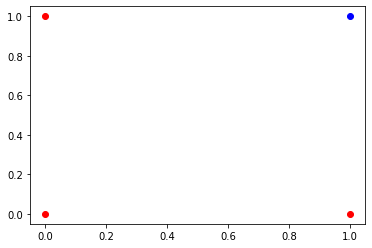

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# NAND gate features
# note: x0 is a dummy variable for the bias term
#     x0   x1  x2
x = [[1., 0., 0.],                                  
     [1., 0., 1.],                                 
     [1., 1., 0.],                                  
     [1., 1., 1.]] 

# Desired outputs
t = [1.,                                            
     1.,                                            
     1.,                                            
     -1.] 
for i in range(0,len(x)):
    if t[i] == 1:
        plt.plot(x[i][1],x[i][2], 'ro')
    else:
        plt.plot(x[i][1],x[i][2], 'bo')
plt.show()


In [2]:
# Training the Perceptron
#
# x:   feature data 
# t:   outputs 
# b:   threshold
# eta: learning rate
# Epochs:   number of iterations

def perceptron_train(x, t, eta, Epochs):
    
    # Initializing parameters for the Perceptron
    w = 2*np.random.random(len(x[0]))-1        # weights 
    n = 0                          
    
    # Initializing additional parameters to compute SSE
    a_vec = np.zeros(len(t))     # vector for predictions
    errors = np.zeros(len(t))       # vector for errors (actual - predictions)
    J = []                         # vector for the SSE cost function
     
        
    while n < Epochs:                                  
        for i in range(0, len(x)):                 
            
            # summation step
            f = np.dot(x[i], w)                      
                        
            # activation function
            if f > 0:                               
                a = 1.                               
            elif f < 0:                                   
                a = -1. 

            a_vec[i] = a                             
        
            # updating the weights
            for j in range(0, len(w)):             
                w[j] = w[j] + eta*(t[i]-a)*x[i][j]
                
            n += 1     

        
        # computing the sum-of-squared errors
        for i in range(0,len(t)):     
           errors[i] = (t[i]-a_vec[i])**2
        J.append(0.5*np.sum(errors))
        
           
    # function returns the weight vector, and sum-of-squared errors        
    return w, J

The weights are:
[ 0.5476381  -0.4329122  -0.28892731] 

The sum-of-squared erros are:
[4.0, 6.0, 6.0, 4.0, 6.0, 4.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


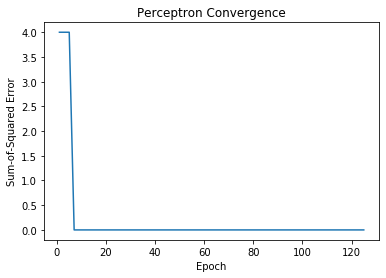

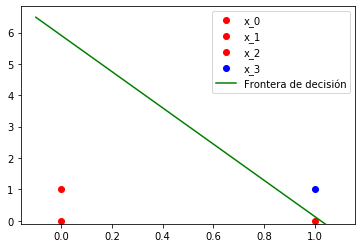

In [3]:
eta = 0.1   # learning rate
Epochs = 500   # number of iterations

print("The weights are:") 
print(perceptron_train(x, t, eta, Epochs)[0], "\n") 

print("The sum-of-squared erros are:") 
print(perceptron_train(x, t, eta, Epochs)[1]) 


# pulling out the sum-of-squared errors from the tuple
J = perceptron_train(x, t, eta, Epochs)[1]     
epoch = np.linspace(1,len(J),len(J))

%matplotlib inline  
plt.plot(epoch, J)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')
plt.show()

# Frontera de decisión
w = perceptron_train(x, t, eta, Epochs)[0]
x_vals =  np.arange(-0.1, 1.1,0.1)
y_vals = (- x_vals * w[1] -w[0])/w[2]

for i in range(0,len(x)):
    if t[i] == 1:
        plt.plot(x[i][1],x[i][2], 'ro', label = 'x_'+ str(i))
    else:
        plt.plot(x[i][1],x[i][2], 'bo', label = 'x_'+ str(i))

plt.plot(x_vals,y_vals, 'g',label = 'Frontera de decisión')
plt.legend()
plt.axis(ymin = -0.1)
plt.show()

### Ejemplo 2 Conjunto de datos sintético
Se creará un conjunto de datos sintéticos.


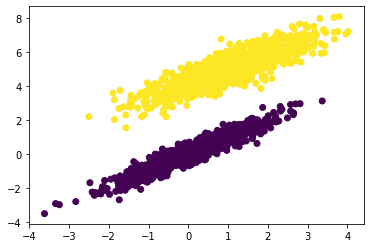

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# setting the random seed to reproduce results
np.random.seed(5)

# number of observations
obs = 1000

# generating synthetic data from multivariate normal distribution  
class_zeros = np.random.multivariate_normal([0,0], [[1.,.95],[.95,1.]], obs)
class_ones = np.random.multivariate_normal([1,5], [[1.,.85],[.85,1.]], obs)

# generating a column of ones as a dummy feature to create an intercept
intercept = np.ones((2*obs,1))

# vertically stacking the two classes 
features = np.vstack((class_zeros, class_ones)).astype(np.float32)

# putting in the dummy feature column
features = np.hstack((intercept, features))

# creating the labels for the two classes
label_zeros = np.zeros((obs,1))
label_ones = np.ones((obs,1))

# stacking the labels, and then adding them to the dataset
labels = np.vstack((label_zeros,label_ones))

dataset = np.hstack((features,labels))

# scatter plot to visualize the two classes (red=1, blue=0)
plt.scatter(features[:,1], features[:,2], c = labels[:,0])


### Muestras de pueba y entrenamiento
En este ejemplo se separará 70\% de la muestra para el entrenamiento y el 30\% restante será para prueba.


In [5]:
# shuffling the data to make the sampling random
np.random.shuffle(dataset)

# splitting the data into train/test sets
train = dataset[0:int(0.7*(obs*2))]

test = dataset[int(0.7*(obs*2)):(obs*2)]
print('Size data = ',len(dataset), '\nSize training data = ',len(train),'\nSize test data = ',len(test))

Size data =  2000 
Size training data =  1400 
Size test data =  600


### Training the Model
Ahora se obtendran los pesos a partir del set de entrenamiento.

In [6]:
def perceptron_train(x, t, eta, Epochs):
    
    # Initializing parameters for the Perceptron
    w =0* 2*np.random.random(len(x[0]))        # weights 
    n = 0                          
    
    # Initializing additional parameters to compute SSE
    a_vec = np.zeros(len(t))     # vector for predictions
    errors = np.zeros(len(t))       # vector for errors (actual - predictions)
    J = []                         # vector for the SSE cost function
    
    while n < Epochs:       
#         print('n=',n,'epochs',Epochs)
        for i in range(0, len(x)):                 
            
            # summation step
            f = np.dot(x[i], w)                      
                        
            # activation function
            if f >= 0.:                               
                a = 1.                               
            else:                                   
                a = 0. 

            a_vec[i] = a                             
        
            # updating the weights
            for j in range(0, len(w)):             
                w[j] = w[j] + eta*(t[i]-a)*x[i][j]
                
        n += 1     

        # computing the sum-of-squared errors
        for i in range(0,len(t)):     
           errors[i] = (t[i]-a_vec[i])**2
        J.append(0.5*np.sum(errors))
           
    # function returns the weight vector, and sum-of-squared errors        
    return w, J


The weights are:
[-0.7        -0.43283606  0.42203522] 

The sum-of-squared erros are:
[5.5, 0.0, 0.0, 0.0, 0.0]


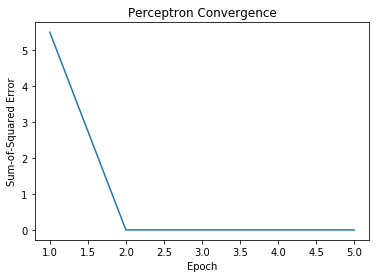

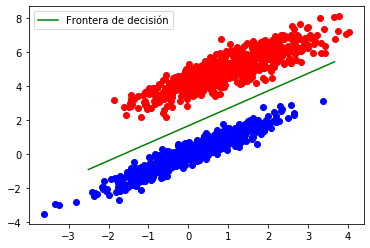

In [7]:
# Training the Perceptron
#
# Inputs
# x:   feature data
# t:   outputs 
# eta: learning rate
# Epochs:   number of iterations

# reshaping the data for the function
x_train = train[:,0:3]
y_train = train[:,3]
x_test = test[:,0:3]
y_test = test[:,3]

eta = 0.1   # learning rate
Epochs = 5  # number of iterations


w,J = perceptron_train(x_train, y_train, eta, Epochs)
# J = perceptron_train(x_train, y_train, eta, Epochs)[1]
print("The weights are:") 
print(w, "\n") 
print("The sum-of-squared erros are:") 
print(J) 

# pulling out the sum-of-squared errors from the tuple  
epoch = np.linspace(1,len(J),len(J))

%matplotlib inline  
plt.plot(epoch, J)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')
plt.show()

# Frontera de decisión
minx = np.min(x_test[:,1])
maxx = np.max(x_test[:,1])
x_vals = np.linspace(minx,maxx,100)
#  =  np.arange(-4, 4.5,0.1)
y_vals = (- x_vals * w[1] -w[0])/w[2]

x = x_train
t = y_train
for i in range(0,len(x)):
    if t[i] == 1:
        plt.plot(x[i][1],x[i][2], 'ro')
    else:
        plt.plot(x[i][1],x[i][2], 'bo')

plt.plot(x_vals,y_vals, 'g',label = 'Frontera de decisión')
plt.legend()
plt.show()

### Probar el modelo
Ahora probaremos el modelo con el conjunto de prueba.

In [8]:
def perceptron_test(x, w, eta, Epochs):                       
    
    # Initializing additional parameters to compute SSE
    a_pred = []     # vector for predictions

    for i in range(0, len(x)):                 

        # summation step
        f = np.dot(x[i], w)                      

        # activation function
        if f > 0.0:                               
            a = 1.0                               
        elif f < 0.0:                                   
            a = 0.0 

        a_pred.append(a)       
        
    return a_pred

In [9]:
from sklearn.metrics import accuracy_score
a_pred = perceptron_test(x_test, w, eta, Epochs)
print(accuracy_score(y_test, a_pred))

1.0


Lo que indica que el modelo finciona perfectamente. Esto es debido a que es muy simple. Para verificarlo, se usará la implementación de [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) para comparar los modelos.


## Scikit_Learn

In [10]:
from sklearn.linear_model import Perceptron

# training the sklearn Perceptron
clf = Perceptron(random_state=None, eta0= 0.1, shuffle=False, fit_intercept=False)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print("sklearn weights:",clf.coef_[0])
print( "my perceptron weights:",w)
print("sklearn weights/my perceptron weights:",clf.coef_[0]/w)

sklearn weights: [-0.7        -0.43283606  0.42203522]
my perceptron weights: [-0.7        -0.43283606  0.42203522]
sklearn weights/my perceptron weights: [1. 1. 1.]


In [55]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])


The scikit-learn implementation yielded identical weights to my model.  This isn't surprising given the clear separability of the two datasets.  

I did have to manipulate a few details in the scikit-learn model though.  I turned off the random state and the shuffle option so that the scikit-learn Perceptron would use the same random seed that I set for my model.  I also set the learning rate to the same number as my perceptron.  Finally, I turned of the fit_intercept option.  Since I included the dummy column of ones in the dataset, I'm automatically fitting the intercept, so I don't need this option turned on.
## Conclusion
In this article I built a Perceptron model from scratch in Python.  Compared to the scikit-learn implementation, my model yielded identical results.  In a real life problem would I use my model over something from scikit-learn? Probably not.  My model is not nearly as optimized or robust as the scikit-learn implementation.  The real value in building a model from scratch is gaining a deeper understanding of how an algorithm actually works.  Understanding the underlying assumptions and limitations is extremely important when applying a machine learning model.

In [34]:
# Object oriented Perceptron
import numpy as np
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    Epoch : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, Epochs=50, random_state=1):
        self.eta = eta
        self.Epochs = Epochs
        self.random_state = random_state

    def fit(self, x, t):
        """Fit training data.

        Parameters
        ----------
        x : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        t : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.errors_ = []

        for _ in range(self.Epochs):
            errors = 0
            for xi, target in zip(x, t):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, x):
        """Calculate net input"""
        return np.dot(x, self.w_[1:]) + self.w_[0]

    def predict(self, x):
        """Return class label after unit step"""
        return np.where(self.net_input(x) >= 0.0, 1, -1)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


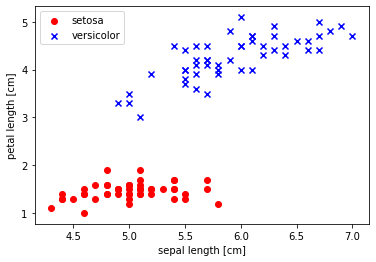

In [35]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

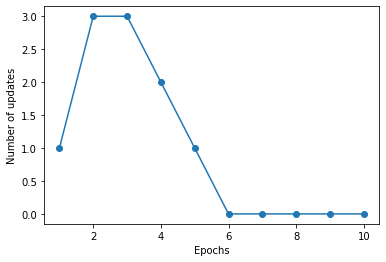

In [37]:
# Training
ppn = Perceptron(eta=0.1, Epochs=10)

ppn.fit(X, y)

print(ppn)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [32]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

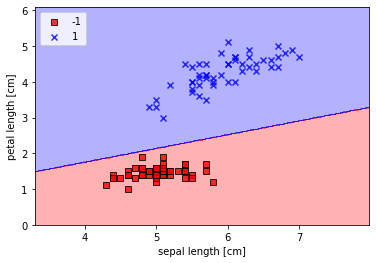

In [33]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [54]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import Perceptron
from mlxtend.classifier import Adaline
from mlxtend.classifier import MultiLayerPerceptron
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)xw
X, y = make_moons(n_samples=100, random_state=123)
fig = plt.figure(figsize=(10,8))

ppn = Perceptron(epochs=50, eta=0.05, random_seed=0)
ppn.fit(X, y)
ada = Adaline(epochs=50, eta=0.05, random_seed=0)
ada.fit(X, y)

mlp = MultiLayerPerceptron(n_output=len(np.unique(y)),
                           n_features=X.shape[1],
                           n_hidden=150,
                           l2=0.0,
                           l1=0.0,
                           epochs=500,
                           eta=0.01,
                           alpha=0.0,
                           decrease_const=0.0,
                           minibatches=1,
                           shuffle_init=False,
                           shuffle_epoch=False,
                           random_seed=0)

mlp = mlp.fit(X, y)


for clf, lab, grd in zip([ppn, ppn, mlp],
                         ['Perceptron', 'Adaline', 'MLP (logistic sigmoid)'],
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
def select_features_labels(data, good_thres=7, bad_thres=4, feature_list=["pH", "alcohol"], labels=(1, 0)):
    tmp = data[feature_list + ["quality"]][(
        data['quality'] > good_thres) | (data['quality'] < bad_thres)]
    tmp['quality'].where(tmp['quality'] < bad_thres, labels[0], inplace=True)
    tmp['quality'].where(tmp['quality'] == 1, labels[1], inplace=True)
    features = tmp[feature_list].values
    labels = tmp['quality'].values
    return (features, labels)

In [55]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    Epoch : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    # Function to initialize the weights
    def __init__(self,features,labels,bias,l_rate=0.01,Epochs=50, random_state=1):
        self.l_rate = l_rate
        self.Epochs = Epochs
        self.random_state = random_state
        self.features = features
        self.labels = labels
        self.bias = bias
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + self.features.shape[1])
        self.errors_ = []
    
    def forward_pass(self, X):
        # Sumation step: a = sum_i (w_i*x_i) + b
        return (self.act_step(sum(self.weights * X) + self.bias))
    # Activation function whith 0 as threshold
    def act_step(self, nb):
        if (nb >= 0):
            return (1)
        else:
            return (0)
    # Compare inputs with expected values 
    def evaluate(self, features, labels):
        errors = 0
        for xi,t in zip(features, labels):
            output = self.forward_pass(xi)
            # Check if the output is the expected value y
            if (output != t):
                errors += 1
        return (errors)

    # Updating the weights 
    def update_weights(self, output, features, labels, l_rate):
        error = labels - output
        if (error != 0):
            # b = b + eta * e
            self.bias += l_rate * error
            # w = w + e * eta * x
            self.weights += error * l_rate * X    
    # Training
    def train(self,features, labels,l_rate, epochs,bias):
        self.bias = bias
        """Fit training data.
        Parameters
        ----------
        features : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        labels : array-like, shape = [n_examples]
          Target values.
        Returns
        -------
        self : object
        """  
        perf = []
        J = []
        perf.append((0, 0, copy.copy(self.weights), copy.copy(J)))

        for _ in range(self.Epochs):
            errors = 0
            for xi, target in zip(features, labels):
                self.update_weights(output, xi, target, l_rate)
                errors = self.evaluate(features, labels)
            perf.append(_, errors, copy.copy(self.weights), copy.copy(J))
            J.append(0.5*np.sum(errors))
        self.perf = perf
        return perf


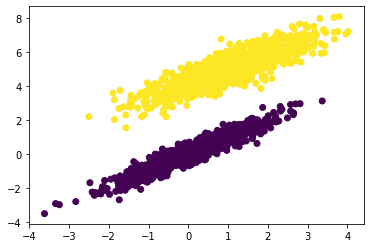

In [56]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# setting the random seed to reproduce results
np.random.seed(5)

# number of observations
obs = 1000

# generating synthetic data from multivariate normal distribution  
class_zeros = np.random.multivariate_normal([0,0], [[1.,.95],[.95,1.]], obs)
class_ones = np.random.multivariate_normal([1,5], [[1.,.85],[.85,1.]], obs)

# generating a column of ones as a dummy feature to create an intercept
intercept = np.ones((2*obs,1))

# vertically stacking the two classes 
features = np.vstack((class_zeros, class_ones)).astype(np.float32)

# putting in the dummy feature column
features = np.hstack((intercept, features))

# creating the labels for the two classes
label_zeros = np.zeros((obs,1))
label_ones = np.ones((obs,1))

# stacking the labels, and then adding them to the dataset
labels = np.vstack((label_zeros,label_ones))

dataset = np.hstack((features,labels))

# scatter plot to visualize the two classes (red=1, blue=0)
plt.scatter(features[:,1], features[:,2], c = labels[:,0])





In [57]:
# shuffling the data to make the sampling random
np.random.shuffle(dataset)

# splitting the data into train/test sets
train = dataset[0:int(0.7*(obs*2))]

test = dataset[int(0.7*(obs*2)):(obs*2)]
print('Size data = ',len(dataset), '\nSize training data = ',len(train))
# reshaping the data for the function
x_train = train[:,0:3]
t_train = train[:,3]
x_test = test[:,0:3]
t_test = test[:,3]

eta = 0.1   # learning rate
Epochs = 5  # number of iterations
# my_perceptron = Perceptron
performance = Perceptron.train(features=x_train,labels=t_train,l_rate=0.01,epochs=50,bias=intercept)
print(performance)

Size data =  2000 
Size training data =  1400


TypeError: train() missing 1 required positional argument: 'self'